<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/Deep_Learning_Projects/blob/main/Dog%20breed%20prediction/Developing%20Model/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp


100% 688M/691M [00:03<00:00, 217MB/s]
100% 691M/691M [00:03<00:00, 225MB/s]


In [11]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [56]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
labels_all = pd.read_csv("/content/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [58]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head(20)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
tibetan_terrier         107
airedale                107
leonberg                106
cairn                   106
beagle                  105
japanese_spaniel        105
australian_terrier      102
miniature_pinscher      102
blenheim_spaniel        102
irish_wolfhound         101
Name: breed, dtype: int64

In [59]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog','afghan_hound',
'entlebucher','pomeranian']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [60]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/content/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 699/699 [00:02<00:00, 261.66it/s]


Train Images shape:  (699, 224, 224, 3)  size: 105,219,072
One-hot encoded output shape:  (699, 6)  size: 4,194


In [61]:
# Building the Model
model = Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [83]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [21]:
# data augmentation


In [84]:
# Training the model
epochs = 10
batch_size = 128

history = model.fit(X_train, Y_train, 
                    batch_size = 120 ,
                    epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/10
5/5 [==============================] - 1s 164ms/step - loss: 0.1531 - accuracy: 0.9523 - val_loss: 0.2205 - val_accuracy: 0.9524
Epoch 2/10
5/5 [==============================] - 1s 148ms/step - loss: 0.1080 - accuracy: 0.9702 - val_loss: 0.1820 - val_accuracy: 0.9444
Epoch 3/10
5/5 [==============================] - 1s 148ms/step - loss: 0.0809 - accuracy: 0.9841 - val_loss: 0.1792 - val_accuracy: 0.9603
Epoch 4/10
5/5 [==============================] - 1s 144ms/step - loss: 0.0574 - accuracy: 0.9920 - val_loss: 0.2246 - val_accuracy: 0.9444
Epoch 5/10
5/5 [==============================] - 1s 148ms/step - loss: 0.0663 - accuracy: 0.9901 - val_loss: 0.1876 - val_accuracy: 0.9524
Epoch 6/10
5/5 [==============================] - 1s 144ms/step - loss: 0.0469 - accuracy: 0.9960 - val_loss: 0.1736 - val_accuracy: 0.9524
Epoch 7/10
5/5 [==============================] - 1s 145ms/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 0.1791 - val_accuracy: 0.9603
Epoch 8/10
5/5 [====

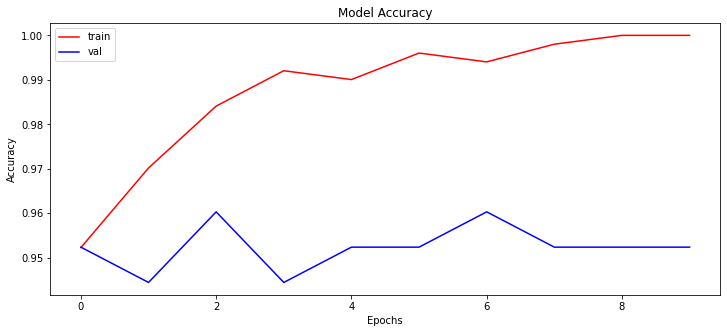

In [85]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [86]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

3/3 [==============================] - 0s 13ms/step - loss: 0.1855 - accuracy: 0.9286
Accuracy over the test set: 
  92.86 %


In [76]:
print(len(X_test))

70


34


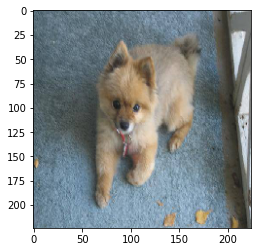

Originally :  maltese_dog
Predicted :  maltese_dog


In [87]:
no = int(input())
plt.imshow(X_test[no,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[no])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[no])])

In [88]:
model.save('dog_92.86.h5')